<a href="https://colab.research.google.com/github/tperfetti/ML/blob/main/Module_7_Perfetti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ingest (1.0)

#### 1.1: Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
import plotly
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
from sklearn.ensemble import RandomForestClassifier   
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV 
from sklearn.model_selection import cross_val_score

In [ ]:
import tensorflow as tf

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### 1.2: Crafting Display Options

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#### 1.3: Loading Data

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
data = pd.read_csv('sample_submission.csv')

#### 1.4: Describing Data

In [ ]:
print(f"Training data size is {train.shape}\nTesting data size is {test.shape}")

Training data size is (42000, 785)
Testing data size is (28000, 784)


In [ ]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,...,pixel534,pixel535,pixel536,pixel537,pixel538,pixel539,pixel540,pixel541,pixel542,pixel543,pixel544,pixel545,pixel546,pixel547,pixel548,pixel549,pixel550,pixel551,pixel552,pixel553,pixel554,pixel555,pixel556,pixel557,pixel558,pixel559,pixel560,pixel561,pixel562,pixel563,pixel564,pixel565,pixel566,pixel567,pixel568,pixel569,pixel570,pixel571,pixel572,pixel573,pixel574,pixel575,pixel576,pixel577,pixel578,pixel579,pixel580,pixel581,pixel582,pixel583,pixel584,pixel585,pixel586,pixel587,pixel588,pixel589,pixel590,pixel591,pixel592,pixel593,pixel594,pixel595,pixel596,pixel597,pixel598,pixel599,pixel600,pixel601,pixel602,pixel603,pixel604,pixel605,pixel606,pixel607,pixel608,pixel609,pixel610,pixel611,pixel612,pixel613,pixel614,pixel615,pixel616,pixel617,pixel618,pixel619,pixel620,pixel621,pixel622,pixel623,pixel624,pixel625,pixel626,pixel627,pixel628,pixel629,pixel630,pixel631,pixel632,pixel633,pixel634,pixel635,pixel636,pixel637,pixel638,pixel639,pixel640,pixel641,pixel642,pixel643,pixel644,pixel645,pixel646,pixel647,pixel648,pixel649,pixel650,pixel651,pixel652,pixel653,pixel654,pixel655,pixel656,pixel657,pixel658,pixel659,pixel660,pixel661,pixel662,pixel663,pixel664,pixel665,pixel666,pixel667,pixel668,pixel669,pixel670,pixel671,pixel672,pixel673,pixel674,pixel675,pixel676,pixel677,pixel678,pixel679,pixel680,pixel681,pixel682,pixel683,pixel684,pixel685,pixel686,pixel687,pixel688,pixel689,pixel690,pixel691,pixel692,pixel693,pixel694,pixel695,pixel696,pixel697,pixel698,pixel699,pixel700,pixel701,pixel702,pixel703,pixel704,pixel705,pixel706,pixel707,pixel708,pixel709,pixel710,pixel711,pixel712,pixel713,pixel714,pixel715,pixel716,pixel717,pixel718,pixel719,pixel720,pixel721,pixel722,pixel723,pixel724,pixel725,pixel726,pixel727,pixel728,pixel729,pixel730,pixel731,pixel732,pixel733,pixel734,pixel735,pixel736,pixel737,pixel738,pixel739,pixe

## EDA (2.0)

#### 2.1: Seperate the target and independant variables

In [ ]:
df_x=train.iloc[:,1:]
df_y=train.iloc[:,0]

In [ ]:
def print_image(row, df):
    temp=df.iloc[row,:].values
    temp = temp.reshape(28,28).astype('uint8')
    plt.imshow(temp)

1

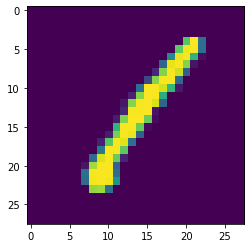

In [ ]:
print_image(0, df_x)
df_y[0]

#### 2.2: Histogram of Values

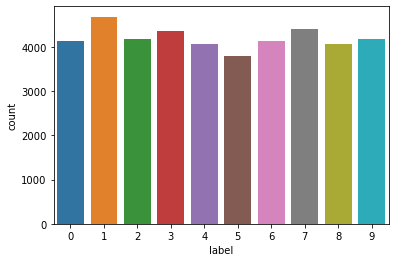

In [ ]:
# Print data histogram
sns.countplot(df_y);

#### 2.3: Count of Values

In [ ]:
df_y.value_counts().sort_index()

0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: label, dtype: int64

## Modeling (3.0)

#### 3.1: Splitting the Dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

(33600, 784)
(8400, 784)


#### 3.2: Fitting Random Forest Classifier

In [ ]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
pred=rf.predict(X_test)
print ("Classification Report")
print(classification_report(y_test, pred))
print ("Confusion Report")
print(confusion_matrix(y_test, pred))

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       813
           1       0.99      0.99      0.99       961
           2       0.96      0.97      0.96       860
           3       0.96      0.94      0.95       863
           4       0.96      0.96      0.96       827
           5       0.96      0.97      0.97       756
           6       0.97      0.98      0.98       841
           7       0.97      0.96      0.96       899
           8       0.95      0.95      0.95       768
           9       0.95      0.94      0.95       812

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400

Confusion Report
[[795   0   0   0   2   2   6   0   8   0]
 [  0 949   5   1   1   1   2   0   2   0]
 [  3   1 835   5   2   0   4   4   6   0]
 [  2   0  16 813   0   9   2   8   9   4]
 [  1   2   0   0 796   0   4 

#### 3.2.1: Defining Compute Timing

In [ ]:
%%time
from datetime import datetime
start=datetime.now()
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
end=datetime.now()
print("Time taken to run classifier : " + str((end-start).total_seconds()) + " secs")

Time taken to run classifier : 44.238923 secs
CPU times: user 31 s, sys: 1.01 s, total: 32 s
Wall time: 44.2 s


#### 3.2.2: Crafting first submission

In [ ]:
pred = rf.predict(test)
pred = pd.Series(pred,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),pred],axis = 1)
submission.to_csv("mnist_rf.csv",index=False)

In [ ]:
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


#### 3.2.3: Checking Prediction Visually

<Figure size 864x720 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

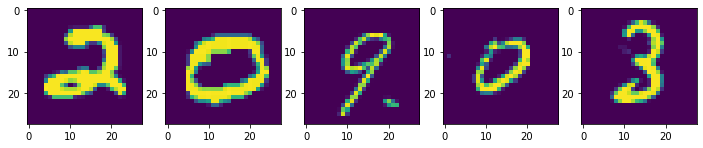

In [ ]:
plt.figure(figsize=(12,10))
for i in range(0,5) :
    plt.subplot(1, 5, i+1)
    print_image(i, test)

#### 3.2.4: Assessing Results

#### 3.3: Principal Component Analysis (PCA)

#### 3.3.1: Understanding Shape & Size

In [ ]:
df_x.shape, test.shape

((42000, 784), (28000, 784))

In [ ]:
combined = pd.concat([df_x, test])
combined.shape

(70000, 784)

#### 3.3.2: Plotting Explained Variance vs. Dimensions

PCA()

154 principal components account for 95 percent of the variability in the MNIST dataset.


(0.0, 784.0, 0.0, 1.0)

Text(0.5, 0, 'Dimensions')

Text(0, 0.5, 'Explained Variance')

Text(0.5, 1.0, '95% Explained Variance vs. Dimensions for MNIST PCA')

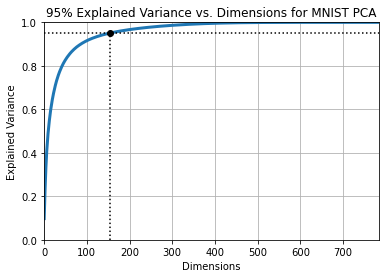

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(combined)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

print("{} principal components account for 95 percent of the variability in the MNIST dataset.".format(round(d)))

plt.plot(cumsum, linewidth = 3)
plt.axis([0,784,0,1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([0,784],[0.95,0.95],"k:")
plt.plot([d,d],[0,0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.grid(True)
plt.title("95% Explained Variance vs. Dimensions for MNIST PCA")
plt.show()

#### 3.3.3: Training with PCA

In [ ]:
pca = PCA(n_components = 154)
pca.fit(combined)

PCA(n_components=154)

In [ ]:
len(pca.components_)

154

In [ ]:
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.fit_transform(test)

In [ ]:
y_train.shape, X_train_reduced.shape

((33600,), (33600, 154))

In [ ]:
%%time
from datetime import datetime
start=datetime.now()
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train_reduced,y_train)
end=datetime.now()
print("Time taken to run classifier : " + str((end-start).total_seconds()) + " secs")

Time taken to run classifier : 70.247499 secs
CPU times: user 1min 3s, sys: 852 ms, total: 1min 4s
Wall time: 1min 10s


In [ ]:
pred = rf.predict(X_test_reduced)
pred = pd.Series(pred,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),pred],axis = 1)
submission.to_csv("mnist_pca_rf.csv",index=False)

#### 3.4: Flixing Any Flaws

#### 3.4.1: Separate the training set from PCA 

In [ ]:
pca = PCA(n_components = 154)
pca.fit(X_train)

PCA(n_components=154)

In [ ]:
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.fit_transform(test)

In [ ]:
%%time
from datetime import datetime
start=datetime.now()
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train_reduced,y_train)
end=datetime.now()
print("Time taken to run classifier : " + str((end-start).total_seconds()) + " secs")

#### 3.4.2: Submitting new results to Kaggle

In [ ]:
pred = rf.predict(X_test_reduced)
pred = pd.Series(pred,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),pred],axis = 1)
submission.to_csv("mnist_pca_rf_fixed.csv",index=False)

#### 3.5: K-Means Clustering

#### 3.5.1: Normalizing Data

In [ ]:
X = X_train.astype(float) / 255.

#### 3.5.2: Initializing & Fitting Model

In [ ]:
from sklearn.cluster import MiniBatchKMeans

n_digits = len(np.unique(y_test))
print(n_digits)
kmeans = MiniBatchKMeans(n_clusters = n_digits)
kmeans.fit(X)
kmeans.labels_y = train.loc[:,['label']].values

10


MiniBatchKMeans(n_clusters=10)

array([2, 7, 2, ..., 5, 1, 5], dtype=int32)

In [ ]:
Y = train.loc[:,['label']].values

In [ ]:
def infer_cluster_labels(kmeans, actual_labels):
    inferred_labels = {}
    for i in range(kmeans.n_clusters):
        # find index of points in cluster
        labels = []
        index = np.where(kmeans.labels_ == i)
        # append actual labels for each point in cluster
        labels.append(actual_labels[index])
        # determine most common label
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))
        # assign the cluster to a value in the inferred_labels dictionary
        if np.argmax(counts) in inferred_labels:
            # append the new number to the existing array at this slot
            inferred_labels[np.argmax(counts)].append(i)
        else:
            # create a new array in this slot
            inferred_labels[np.argmax(counts)] = [i]
     
        #print(labels)
        #print('Cluster: {}, label: {}'.format(i, np.argmax(counts)))
         
    return inferred_labels

def infer_data_labels(X_labels, cluster_labels):
    # empty array of len(X)
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
    return predicted_labels

# test the infer_cluster_labels() and infer_data_labels() functions

cluster_labels = infer_cluster_labels(kmeans, Y)
X_clusters = kmeans.predict(X)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
print(predicted_labels[:20])
print(Y[:20])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[1]
 [0]
 [1]
 [4]
 [0]
 [0]
 [7]
 [3]
 [5]
 [3]
 [8]
 [9]
 [1]
 [3]
 [3]
 [1]
 [2]
 [0]
 [7]
 [5]]


#### 3.5.3: Plotting Data

MiniBatchKMeans(n_clusters=36)

Text(0.5, 1.0, 'Inferred Label: 1')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 0')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 2')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 1')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 7')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 7')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 1')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 9')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 3')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 1')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 4')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 3')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 4')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 9')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 4')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 9')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 1')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 7')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 1')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 1')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 3')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 1')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 3')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 8')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 1')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 3')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 2')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 0')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 1')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 1')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 7')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 1')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 8')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 7')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 7')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 1')

(-0.5, 27.5, 27.5, -0.5)

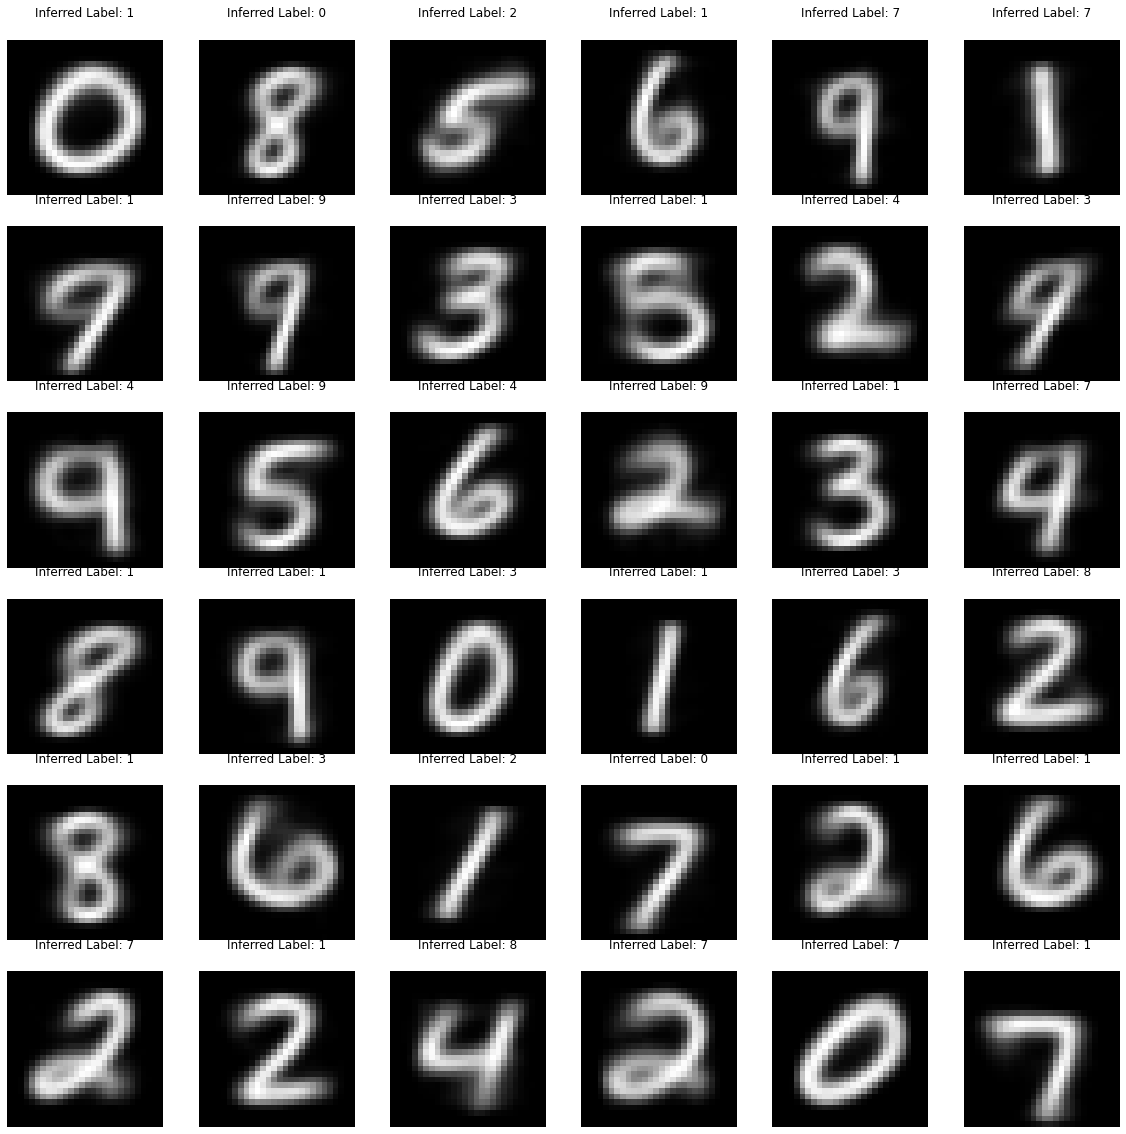

In [ ]:
# Initialize and fit KMeans algorithm
kmeans = MiniBatchKMeans(n_clusters = 36)
kmeans.fit(X)

# record centroid values
centroids = kmeans.cluster_centers_

# reshape centroids into images
images = centroids.reshape(36, 28, 28)
images *= 255
images = images.astype(np.uint8)

# determine cluster labels
cluster_labels = infer_cluster_labels(kmeans, Y)

# create figure with subplots using matplotlib.pyplot
fig, axs = plt.subplots(6, 6, figsize = (20, 20))
plt.gray()

# loop through subplots and add centroid images
for i, ax in enumerate(axs.flat):
    
    # determine inferred label using cluster_labels dictionary
    for key, value in cluster_labels.items():
        if i in value:
            ax.set_title('Inferred Label: {}'.format(key))
    
    # add image to subplot
    ax.matshow(images[i])
    ax.axis('off')
    
# display the figure
fig.show()

#### Section 3.6: Design of Experiments

#### Section 3.6.1: Building Network Parameters

In [ ]:

n_hidden_1 = 20 # 1st layer number of neurons
n_hidden_2 = 20 # 2nd layer number of neurons 
n_hidden_3 = 20 # 3rd layer number of neurons
n_hidden_4 = 20 # 4th layer number of neurons
n_hidden_5 = 20 # 5th layer number of neurons
n_input = 784   # MNIST data input (img shape: 28*28)
n_classes = 10  # MNIST total classes (0-9 digits)

#### Section 3.6.2: Graph Preparation

In [ ]:
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_classes])

#### Section 3.6.3: Implementing Weights and Biases

In [ ]:
## weights
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3])),
    'h4': tf.Variable(tf.random_normal([n_hidden_3, n_hidden_4])),
    'h5': tf.Variable(tf.random_normal([n_hidden_4, n_hidden_5])),
    'out': tf.Variable(tf.random_normal([n_hidden_5, n_classes]))
}

In [ ]:
## biases
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'b3': tf.Variable(tf.random_normal([n_hidden_3])),
    'b4': tf.Variable(tf.random_normal([n_hidden_4])),
    'b5': tf.Variable(tf.random_normal([n_hidden_5])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

#### Section 3.6.4: Multilater Perceptron Model

In [ ]:
def multilayer_perceptron(x, weights, biases):
    # Hidden fully connected layer with neurons
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.leaky_relu(layer_1)
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.leaky_relu(layer_2)
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.leaky_relu(layer_3)
    layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
    layer_4 = tf.nn.leaky_relu(layer_4)
    layer_5 = tf.add(tf.matmul(layer_4, weights['h5']), biases['b5'])
    layer_5 = tf.nn.leaky_relu(layer_5)
    # Output fully connected layer with a neuron for each class
    out_layer = tf.matmul(layer_5, weights['out']) + biases['out']
    return out_layer

logits = multilayer_perceptron(X, weights, biases)

#### Section 3.6.5: Model Execution

In [ ]:
display_step = 0

def run_model( weights, biases, learning_rate, training_epochs, batch_size ):

  logits = multilayer_perceptron(X, weights, biases)

  model_metrics = {}

  # Optimizer
  optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)

  model_metrics['learning_rate'] = learning_rate

  # Loss

  loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
      logits=logits, labels=Y))

  train_op = optimizer.minimize(loss_op)

  model_metrics['learning_rate'] = learning_rate

  init = tf.global_variables_initializer()

  with tf.Session() as sess:
      sess.run(init)

      saver = tf.train.Saver()

      start_time = time.clock()

      model_metrics['training_epochs'] = training_epochs

      model_metrics["epoches"] = []

      # Training cycle
      for epoch in range(training_epochs):

          avg_cost = 0.
          total_batch = int(mnist.train.num_examples/batch_size)
          model_metrics['total_batch'] = total_batch

          # Loop over all batches
          for i in range(total_batch):
              batch_x, batch_y = mnist.train.next_batch(batch_size)
              # Run optimization op (backprop) and cost op (to get loss value)
              _, c = sess.run([train_op, loss_op], feed_dict={X: batch_x,
                                                              Y: batch_y})
              # Compute average loss
              avg_cost += c / total_batch

          
          model_metrics["epoches"].append((epoch+1, avg_cost))
          
          # Display logs per epoch step
          if display_step != 0 and epoch % display_step == 0:
              display("Epoch:", '%04d' % (epoch+1), "cost={:.9f}".format(avg_cost))

      model_metrics['avg_cost'] = avg_cost

      end_time = time.clock()

      runtime = end_time - start_time  # seconds of wall-clock time 
      model_metrics['run_time'] = runtime

      # Apply Softmax to logits
      pred = tf.nn.softmax(logits)

      # Calculate Accuracy

      correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(Y, 1))
      model_metrics['correct_prediction'] = correct_prediction

      accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
      model_metrics['accuracy'] = accuracy
      
      model_metrics['train_accuracy'] = sess.run(accuracy, feed_dict={X: batch_x,
                                    Y: batch_y})
        
      model_metrics['testing_accuracy'] = sess.run(accuracy, feed_dict={X: mnist.test.images,
                                        Y: mnist.test.labels})
      
      return model_metrics

#### 3.6.6: Model Evaluation

In [ ]:
# Default / baseline
learning_rate = 0.0001
training_epochs = 10
batch_size = 10

baseline_model = run_model( weights, biases, learning_rate = 0.01, training_epochs = 100, batch_size = 100 )

model_v2 = run_model( weights, biases, learning_rate = 0.0125, training_epochs = 250, batch_size = 250 )

model_v3 = run_model( weights, biases, learning_rate = 0.015, training_epochs = 500, batch_size = 500 )

model_v4 = run_model( weights, biases, learning_rate = 0.02, training_epochs = 1000, batch_size = 1000 )

In [ ]:
## summary
def get_model_df(name, model):
  values_df = pd.DataFrame(columns=list(('avg_cost', 'learning_rate', 'run_time','testing_accuracy','train_accuracy')))
  values_df.loc[0] = [model[x] for x in ('avg_cost', 'learning_rate', 'run_time','testing_accuracy','train_accuracy')]
  values_df['name'] = name
  return values_df

#### 3.6.7: Results

In [ ]:
baseline_model = run_model( weights, biases, learning_rate = 0.01, training_epochs = 100, batch_size = 100 )

baseline_df = get_model_df('Baseline', baseline_model)
model_v2_df = get_model_df('Version 2', model_v2)
model_v3_df = get_model_df('Version 3', model_v3)
model_v4_df = get_model_df('Version 4', model_v4)

results = pd.concat([baseline_df, model_v2_df, model_v3_df, model_v4_df]).set_index('name')

In [ ]:
results.plot(y = ['avg_cost', 'testing_accuracy','train_accuracy'], title = "Model Performance", kind = "bar", figsize=(15, 8), use_index = True)
plt.legend(loc='upper left', prop={'size': 16}, bbox_to_anchor=(1,1))
plt.tight_layout(pad=7)
plt.show()

## Conclusion (4.0)

As described in the Module 7 Assignment 1 Requirements section on Canvas, please reference how I addressed each stated requirement/question below:
- <b>Conduct your analysis using a cross-validation design</b>This was addressed in section 3.6.5.
- <b>Conduct / refine EDA</b>This was addressed in section 2.0.
- <b>Conduct Design of Experiments to evaluate the performance of various neural networks</b> This was addressed in section 3.6.5.
- <b>Evaluate goodness of fit metrics on the training and validation sets</b> This was addressed in section 3.6.7.